# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras

## Call the dataset from the kares framework

In [2]:
mnist = tf.keras.datasets.mnist 

## Split the data

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
len(X_train)
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

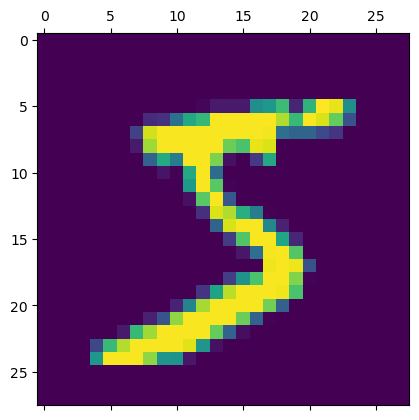

In [7]:
plt.matshow(X_train[0])

## Data preprocessing

In [8]:
x_train = X_train / 255
x_test = X_test / 255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# creating model

In [10]:
from keras.layers import Activation, Dense, Flatten

model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation = 'relu'),
                          keras.layers.Dense(10,activation = 'softmax')])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# compile the model

In [12]:
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=4)

Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1576 - accuracy: 0.9557 - val_loss: 0.1582 - val_accuracy: 0.9555
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1495 - accuracy: 0.9582 - val_loss: 0.1505 - val_accuracy: 0.9571
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1421 - accuracy: 0.9603 - val_loss: 0.1442 - val_accuracy: 0.9588
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1356 - accuracy: 0.9622 - val_loss: 0.1402 - val_accuracy: 0.9607


In [15]:
test_loss,test_accuracy= model.evaluate(x_test,y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9607
loss=0.140
Accuracy=0.961


# making prediction on new data

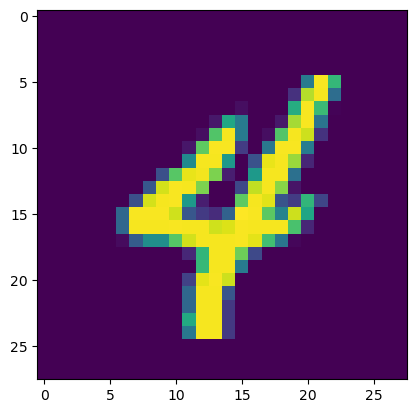

In [16]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# predicted

In [17]:
predicted_value = model.predict(x_test)
print('hand written number in the image is = %d' %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
hand written number in the image is = 4


# plot graph for accuracy and loss

In [18]:
history.history??

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

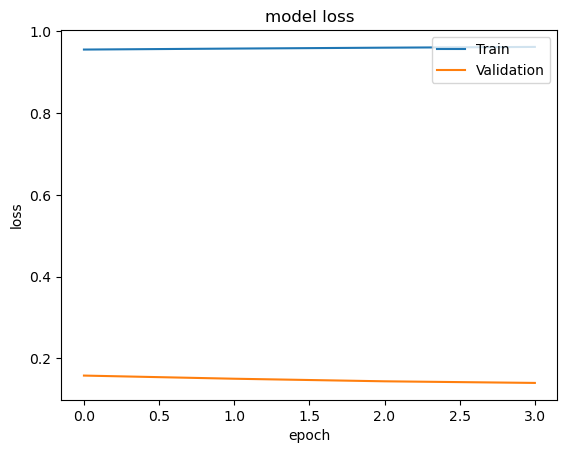

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

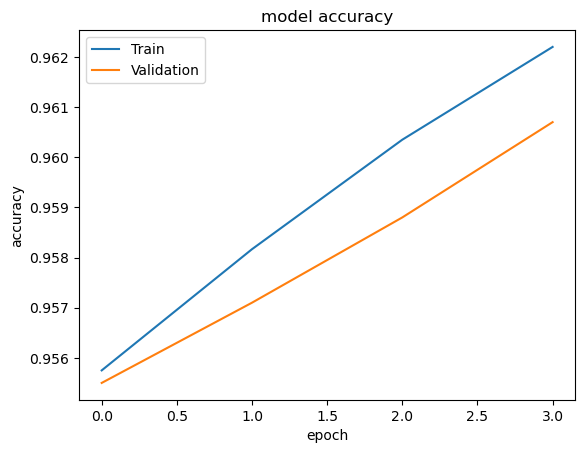

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

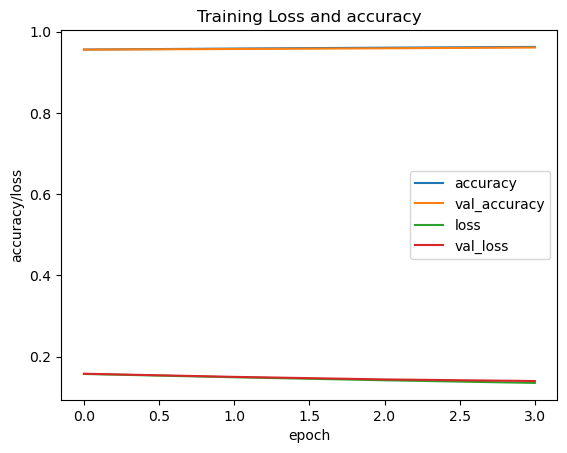

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()

# save model

In [ ]:
#kares_model_path = save location path

In [ ]:
#model.save(keras_model_path)

In [ ]:
#restored_keras_model = tf.keras.model.load_model(keras_model_path)